In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from sklearn.metrics import roc_auc_score, accuracy_score

OUTPUT_COLUMN = "output"

# Get and analyze the data

Data from https://www.kaggle.com/datasets/rashikrahmanpritom/heart-attack-analysis-prediction-dataset
(to run this notebook you will need to manually download `heart.csv` from the link):
- Age : Age of the patient
- Sex : Sex of the patient
- exang: exercise induced angina (1 = yes; 0 = no)
- ca: number of major vessels (0-3)
- cp : Chest Pain type chest pain type
    - Value 1: typical angina
    - Value 2: atypical angina
    - Value 3: non-anginal pain
    - Value 4: asymptomatic
- trtbps : resting blood pressure (in mm Hg)
- chol : cholestoral in mg/dl fetched via BMI sensor
- fbs : (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
- rest_ecg : resting electrocardiographic results
    - Value 0: normal
    - Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
    - Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria
- thalach : maximum heart rate achieved
- target : 0= less chance of heart attack 1= more chance of heart attack

In [2]:
df = pd.read_csv("heart.csv")
df

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [3]:
# One hot encode categorical columns
df = pd.get_dummies(df, columns=["cp", "restecg"])
df

,age,sex,trtbps,chol,fbs,thalachh,exng,oldpeak,slp,caa,thall,output,cp_0,cp_1,cp_2,cp_3,restecg_0,restecg_1,restecg_2
0,63,1,145,233,1,150,0,2.3,0,0,1,1,0,0,0,1,1,0,0
1,37,1,130,250,0,187,0,3.5,0,0,2,1,0,0,1,0,0,1,0
2,41,0,130,204,0,172,0,1.4,2,0,2,1,0,1,0,0,1,0,0
3,56,1,120,236,0,178,0,0.8,2,0,2,1,0,1,0,0,0,1,0
4,57,0,120,354,0,163,1,0.6,2,0,2,1,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,140,241,0,123,1,0.2,1,0,3,0,1,0,0,0,0,1,0
299,45,1,110,264,0,132,0,1.2,1,0,3,0,0,0,0,1,0,1,0
300,68,1,144,193,1,141,0,3.4,1,2,3,0,1,0,0,0,0,1,0
301,57,1,130,131,0,115,1,1.2,1,1,3,0,1,0,0,0,0,1,0


## Corelation heatmap

<AxesSubplot: >

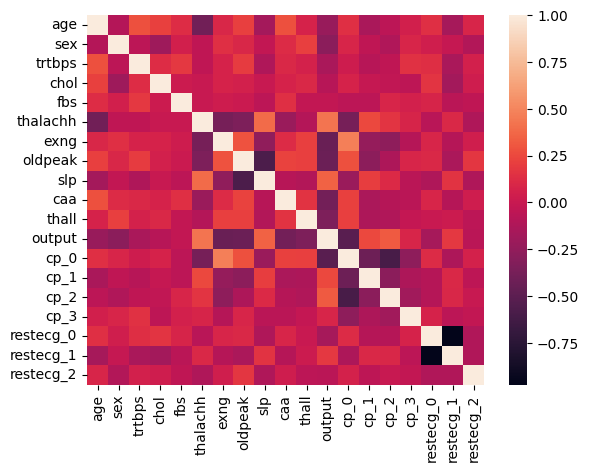

In [4]:
sns.heatmap(df.corr())

## Prepare the data

In [5]:
scaler = StandardScaler()

X, y = df.drop(columns=[OUTPUT_COLUMN]), df[OUTPUT_COLUMN]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train models and evaluate

In [6]:
models = [GradientBoostingClassifier(), RandomForestClassifier(), LogisticRegression()]
scores = [accuracy_score, roc_auc_score]

for m in models:
    m.fit(X_train, y_train)
    y_hat = m.predict(X_test)
    print(f"{str(m): >30}:", end=" ")
    for s in scores:
        print(f"{s.__name__}={s(y_test, y_hat):.3f}", end=" ")
    print()

  GradientBoostingClassifier(): accuracy_score=0.830 roc_auc_score=0.834 
      RandomForestClassifier(): accuracy_score=0.830 roc_auc_score=0.824 
          LogisticRegression(): accuracy_score=0.800 roc_auc_score=0.798 


All 3 models achieved good performance (accuracy >= 80%) but the LogisticRegression was significantly worse than the other two.